<a href="https://colab.research.google.com/github/abhishek-kr27/Data-Analysis/blob/main/United%20Airlines%20Hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
calls = pd.read_csv('calls.csv')
customers = pd.read_csv('customers.csv')
reasons = pd.read_csv('reason.csv')
sentiment_stats = pd.read_csv('sentiment.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(calls.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  


In [ ]:
print(customers.head())

   customer_id      customer_name  elite_level_code
0   2033123310     Matthew Foster               4.0
1   8186702651      Tammy Walters               NaN
2   2416856629      Jeffery Dixon               NaN
3   1154544516      David Wilkins               2.0
4   5214456437  Elizabeth Daniels               0.0


In [ ]:
print(reasons.head())

      call_id primary_call_reason
0  4667960400   Voluntary  Cancel
1  1122072124             Booking
2  6834291559              IRROPS
3  2266439882             Upgrade
4  1211603231             Seating


In [ ]:
print(sentiment_stats.head())

      call_id  agent_id agent_tone customer_tone  average_sentiment  \
0  4667960400    963118    neutral         angry              -0.04   
1  1122072124    519057       calm       neutral               0.02   
2  6834291559    158319    neutral        polite              -0.13   
3  2266439882    488324    neutral    frustrated              -0.20   
4  1211603231    721730    neutral        polite              -0.05   

   silence_percent_average  
0                     0.39  
1                     0.35  
2                     0.32  
3                     0.20  
4                     0.35  


In [ ]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])

In [ ]:
calls['hour'] = calls['call_start_datetime'].dt.hour
calls['day_of_week'] = calls['call_start_datetime'].dt.day_name()
calls['month'] = calls['call_start_datetime'].dt.month

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\663708119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=calls, x='hour', palette='coolwarm')


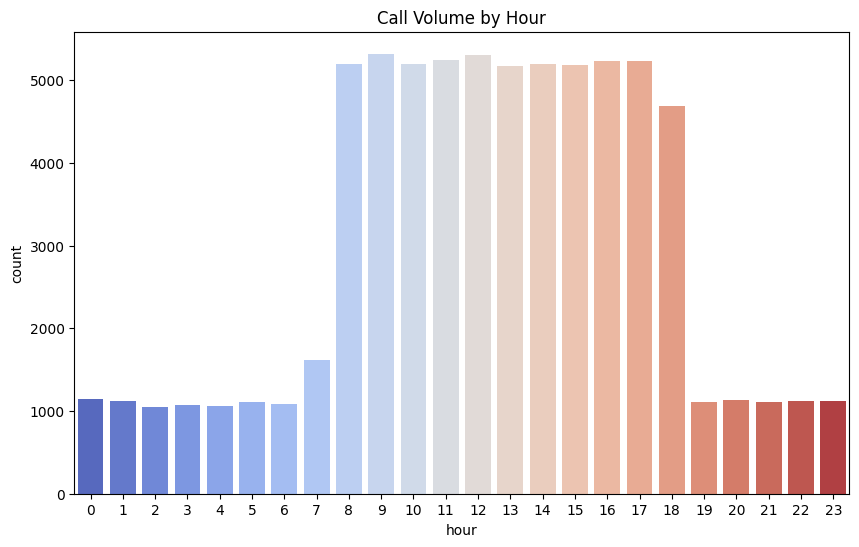

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=calls, x='hour', palette='coolwarm')
plt.title('Call Volume by Hour')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1960670010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=calls, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


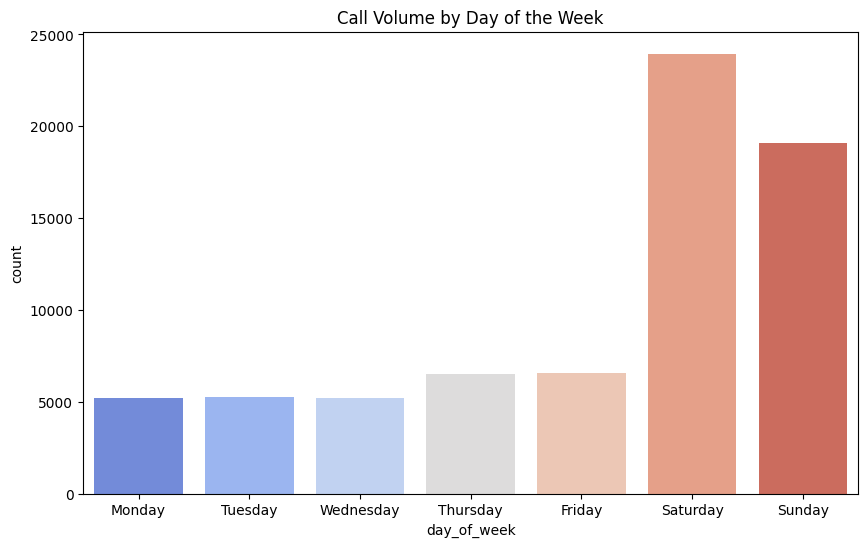

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=calls, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title('Call Volume by Day of the Week')
plt.show()

In [ ]:
calls['handle_time'] = (pd.to_datetime(calls['call_end_datetime']) - pd.to_datetime(calls['agent_assigned_datetime'])).dt.total_seconds() / 60
aht_by_hour = calls.groupby('hour')['handle_time'].mean().reset_index()

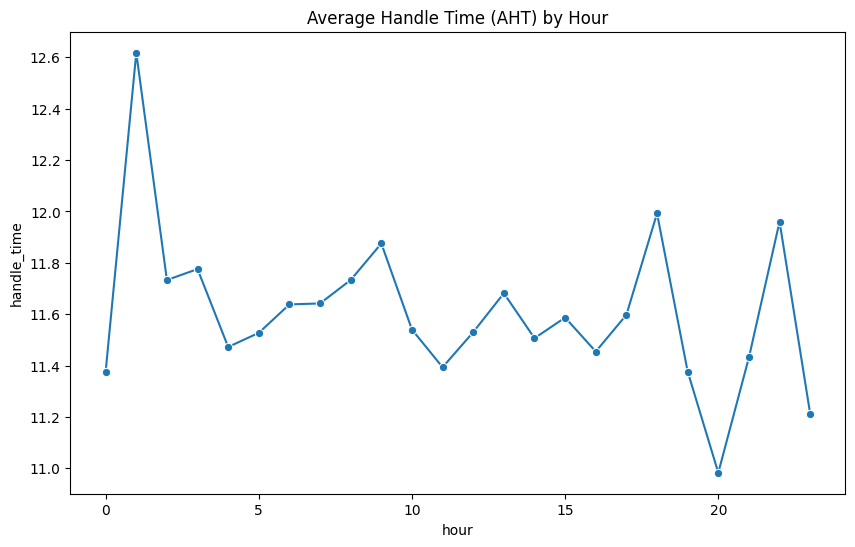

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=aht_by_hour, x='hour', y='handle_time', marker='o')
plt.title('Average Handle Time (AHT) by Hour')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\4028182631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_agents, x='agent_id', y='handle_time', palette='coolwarm')


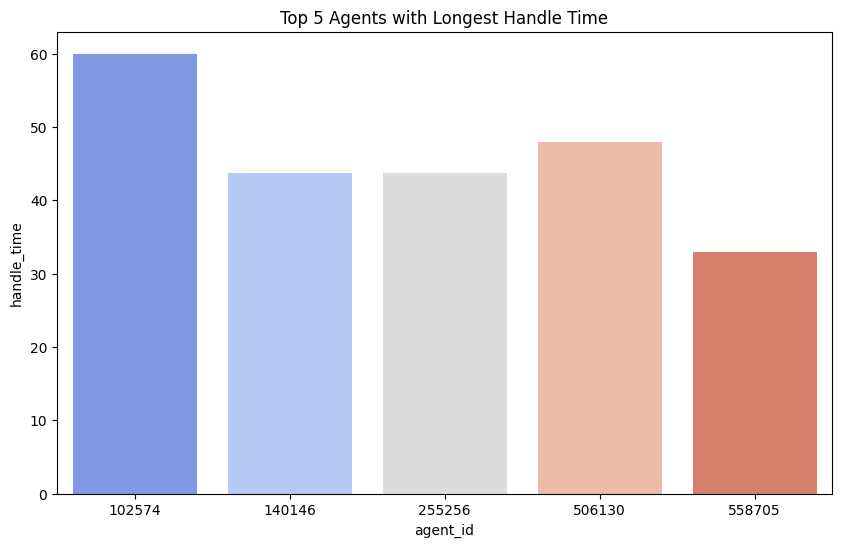

In [ ]:
agent_performance = calls.groupby('agent_id')['handle_time'].mean().reset_index().sort_values(by='handle_time', ascending=False)
top_agents = agent_performance.head()
plt.figure(figsize=(10,6))
sns.barplot(data=top_agents, x='agent_id', y='handle_time', palette='coolwarm')
plt.title('Top 5 Agents with Longest Handle Time')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\649961148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=call_reason_aht, x='primary_call_reason', y='handle_time', palette='coolwarm')


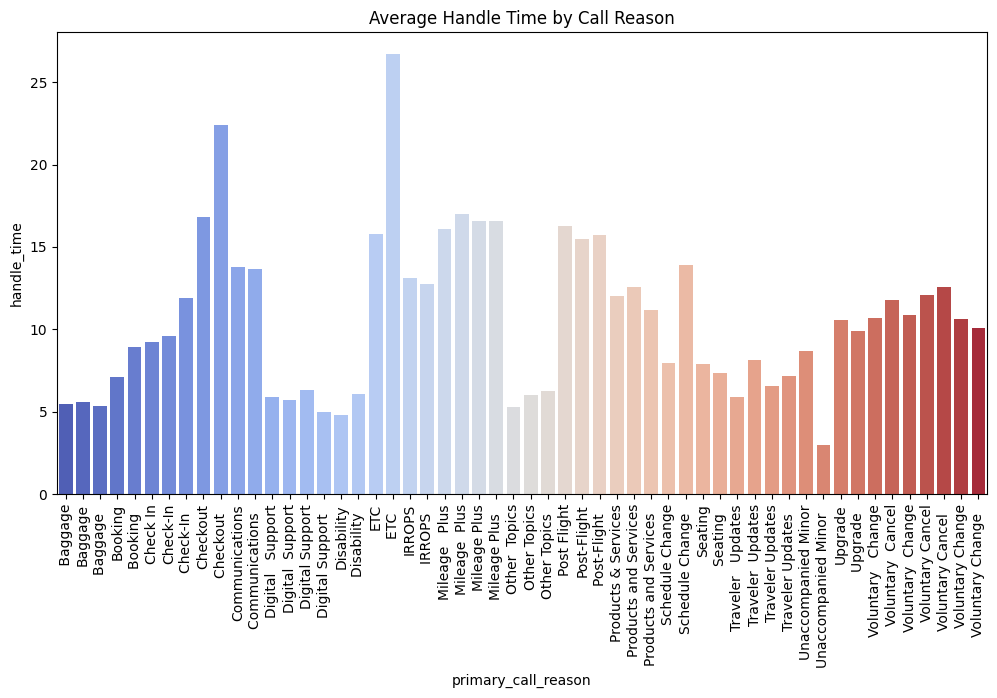

In [ ]:
calls = pd.merge(calls, reasons, on='call_id', how='left')
call_reason_aht = calls.groupby('primary_call_reason')['handle_time'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=call_reason_aht, x='primary_call_reason', y='handle_time', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Handle Time by Call Reason')
plt.show()

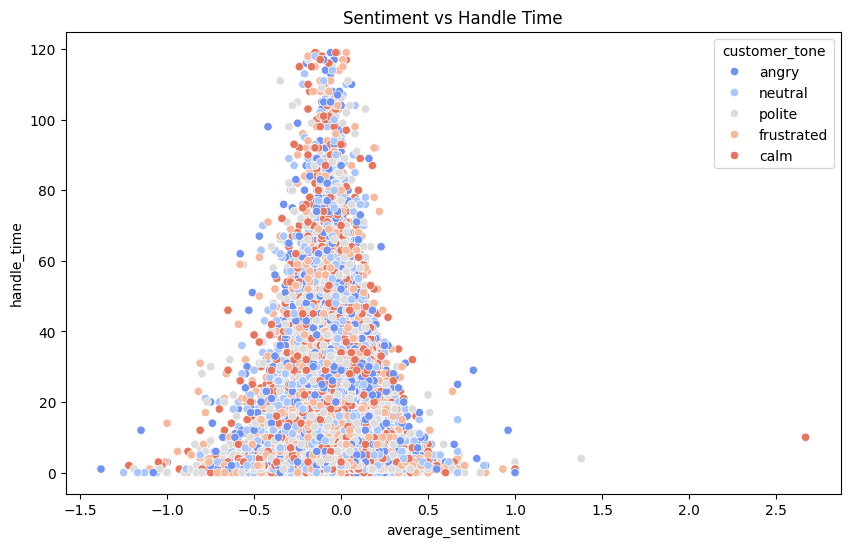

In [ ]:
calls = pd.merge(calls, sentiment_stats, on='call_id', how='left')
plt.figure(figsize=(10,6))
sns.scatterplot(data=calls, x='average_sentiment', y='handle_time', hue='customer_tone', palette='coolwarm')
plt.title('Sentiment vs Handle Time')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_5204\1458420995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_aht = calls.groupby('sentiment_category')['handle_time'].mean().reset_index()
C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_5204\1458420995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_aht, x='sentiment_category', y='handle_time', palette='coolwarm')


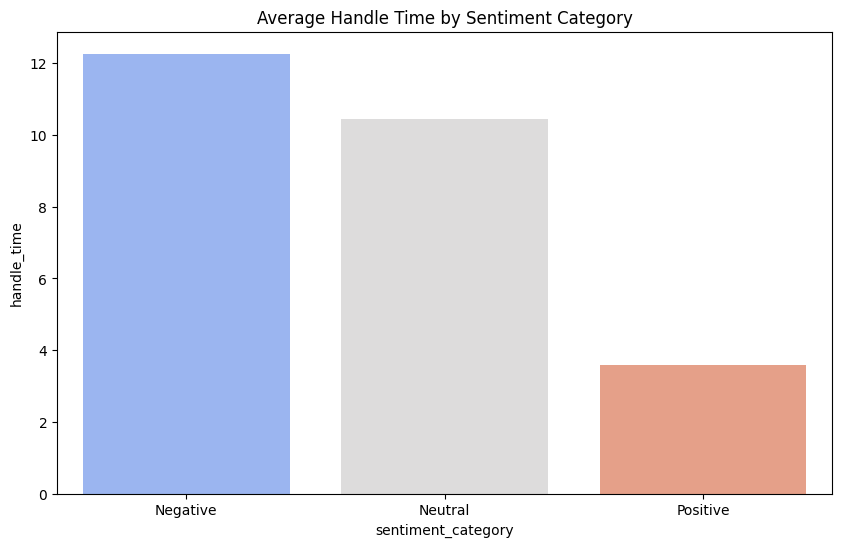

In [ ]:
sentiment_aht = calls.groupby('sentiment_category')['handle_time'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_aht, x='sentiment_category', y='handle_time', palette='coolwarm')
plt.title('Average Handle Time by Sentiment Category')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\36764606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_aht, x='customer_tone', y='handle_time', palette='coolwarm')


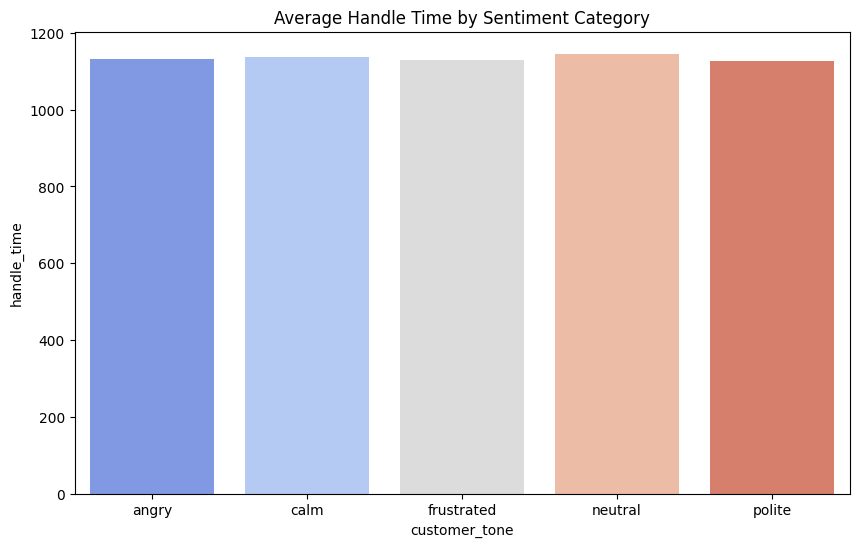

In [ ]:
sentiment_aht = calls.groupby('customer_tone')['handle_time'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_aht, x='customer_tone', y='handle_time', palette='coolwarm')
plt.title('Average Handle Time by Sentiment Category')
plt.show()

In [ ]:
sentiment_summary = calls.groupby('agent_tone')['handle_time'].agg(['mean', 'median', 'std']).reset_index()
print(sentiment_summary)

   agent_tone       mean  median        std
0       angry   6.573265     3.0   9.375220
1        calm  10.441662     7.0  10.742098
2  frustrated  10.284473     6.0  12.237245
3     neutral  12.504607     8.0  14.022196
4      polite   3.666667     2.0   5.281972


In [ ]:
merged_df = pd.merge(calls,sentiment_stats, on='call_id', how='inner')

In [ ]:
merged_df.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'hour', 'day_of_week', 'month', 'handle_time', 'primary_call_reason',
       'agent_id_y', 'agent_tone_x', 'customer_tone_x', 'average_sentiment_x',
       'silence_percent_average_x', 'agent_id', 'agent_tone_y',
       'customer_tone_y', 'average_sentiment_y', 'silence_percent_average_y'],
      dtype='object')

In [ ]:
tone_aht_grouped = merged_df.groupby(['customer_tone_y', 'agent_tone_y'])['handle_time'].mean().reset_index()

In [ ]:
tone_aht_pivot = tone_aht_grouped.pivot(index="customer_tone_y", columns="agent_tone_y", values="handle_time")

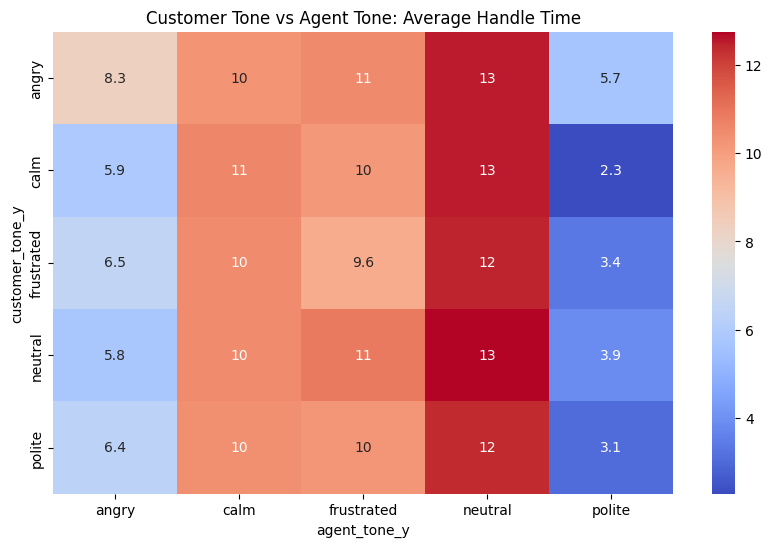

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(tone_aht_pivot, annot=True, cmap='coolwarm')
plt.title('Customer Tone vs Agent Tone: Average Handle Time')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1575413251.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=calls, x='silence_percent_average', y='handle_time', palette='coolwarm')


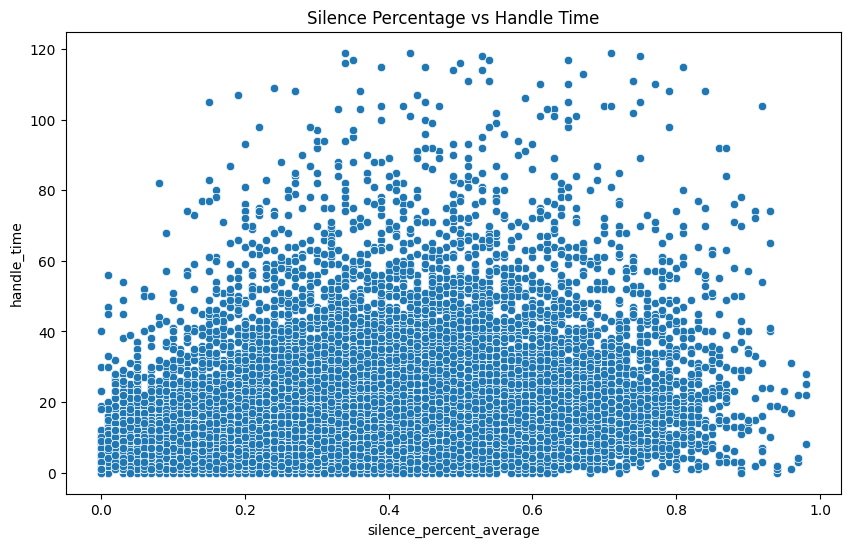

In [ ]:
# Analyze the impact of silence on handle time
plt.figure(figsize=(10,6))
sns.scatterplot(data=calls, x='silence_percent_average', y='handle_time', palette='coolwarm')
plt.title('Silence Percentage vs Handle Time')
plt.show()

In [ ]:
corr_silence = calls['silence_percent_average'].corr(calls['handle_time'])
print(f'Correlation between silence percentage and handle time: {corr_silence}')

Correlation between silence percentage and handle time: 0.4068827036731919


C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\3144231591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=elite_level_aht, x='elite_level_code', y='handle_time', palette='coolwarm')


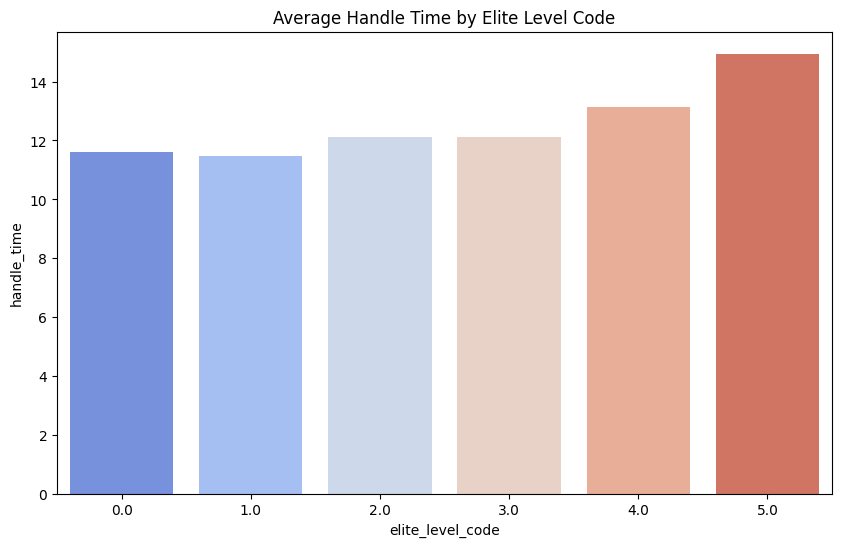

In [ ]:
merged_df = pd.merge(calls, customers, on='customer_id', how='left')
elite_level_aht = merged_df.groupby('elite_level_code')['handle_time'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=elite_level_aht, x='elite_level_code', y='handle_time', palette='coolwarm')
plt.title('Average Handle Time by Elite Level Code')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1298933321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=calls, x='abandoned', y='waiting_time', palette='coolwarm')


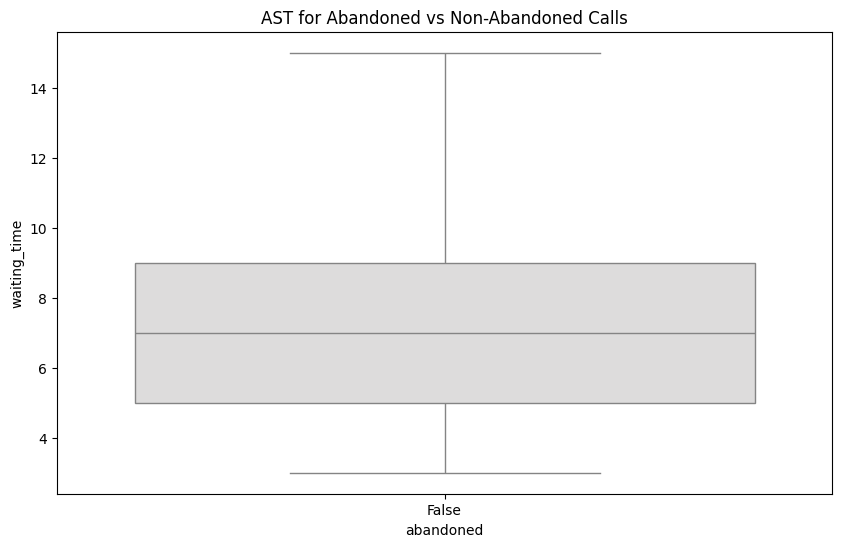

In [ ]:
calls['abandoned'] = calls['agent_assigned_datetime'].isna()
calls['waiting_time'] = (pd.to_datetime(calls['agent_assigned_datetime']) - pd.to_datetime(calls['call_start_datetime'])).dt.total_seconds() / 60
plt.figure(figsize=(10,6))
sns.boxplot(data=calls, x='abandoned', y='waiting_time', palette='coolwarm')
plt.title('AST for Abandoned vs Non-Abandoned Calls')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1690736979.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=seasonality_aht, x='month', y='handle_time', marker='o', palette='coolwarm')


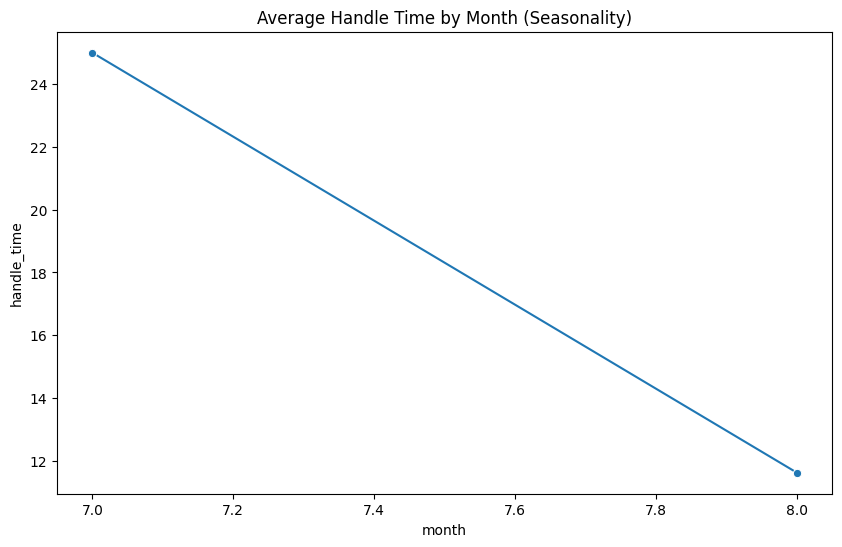

In [ ]:
calls['month'] = calls['call_start_datetime'].dt.month
calls['day'] = calls['call_start_datetime'].dt.day
seasonality_aht = calls.groupby('month')['handle_time'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=seasonality_aht, x='month', y='handle_time', marker='o', palette='coolwarm')
plt.title('Average Handle Time by Month (Seasonality)')
plt.show()

In [ ]:
threshold = calls['handle_time'].quantile(0.95)
long_calls = calls[calls['handle_time'] > threshold]
print(long_calls.describe())

            call_id   customer_id     agent_id_x  \
count  3.456000e+03  3.456000e+03    3456.000000   
mean   4.899245e+09  5.011511e+09  563176.832465   
min    7.688000e+05  3.826013e+06  102574.000000   
25%    2.375068e+09  2.458998e+09  338544.000000   
50%    4.879185e+09  4.991464e+09  594957.000000   
75%    7.405393e+09  7.564594e+09  785066.750000   
max    9.999669e+09  9.997081e+09  993862.000000   
std    2.877912e+09  2.928995e+09  261123.542067   

                 call_start_datetime         hour   month  handle_time  \
count                           3456  3456.000000  3456.0  3456.000000   
mean   2024-08-16 11:21:46.840277504    12.273727     8.0    54.330729   
min              2024-08-01 00:23:00     0.000000     8.0    38.000000   
25%              2024-08-09 12:19:45     9.000000     8.0    42.000000   
50%              2024-08-17 09:37:00    12.000000     8.0    50.000000   
75%              2024-08-24 14:11:00    16.000000     8.0    61.000000   
max          

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1480657728.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=weekday_aht, x='day_of_week', y='handle_time', marker='o', palette='coolwarm')


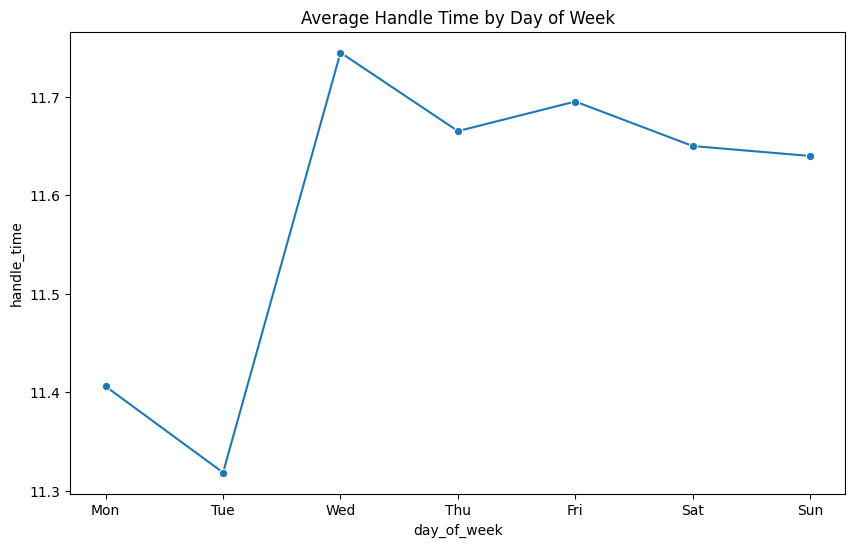

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['day_of_week'] = calls['call_start_datetime'].dt.dayofweek
weekday_aht = calls.groupby('day_of_week')['handle_time'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=weekday_aht, x='day_of_week', y='handle_time', marker='o', palette='coolwarm')
plt.title('Average Handle Time by Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### 2.

In [ ]:
merged_df = pd.merge(calls, reasons, on='call_id', how='left')
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,hour,day_of_week,month,...,primary_call_reason_x,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,abandoned,waiting_time,day,primary_call_reason_y
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,23,2,7,...,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,False,7.0,31,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,Booking,519057,calm,neutral,0.02,0.35,False,3.0,1,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,23,2,7,...,IRROPS,158319,neutral,polite,-0.13,0.32,False,8.0,31,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,Upgrade,488324,neutral,frustrated,-0.20,0.20,False,5.0,1,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,Seating,721730,neutral,polite,-0.05,0.35,False,10.0,1,Seating


C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\2503387500.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequent_reasons.head(10), x='count', y='primary_call_reason_y', palette='coolwarm')


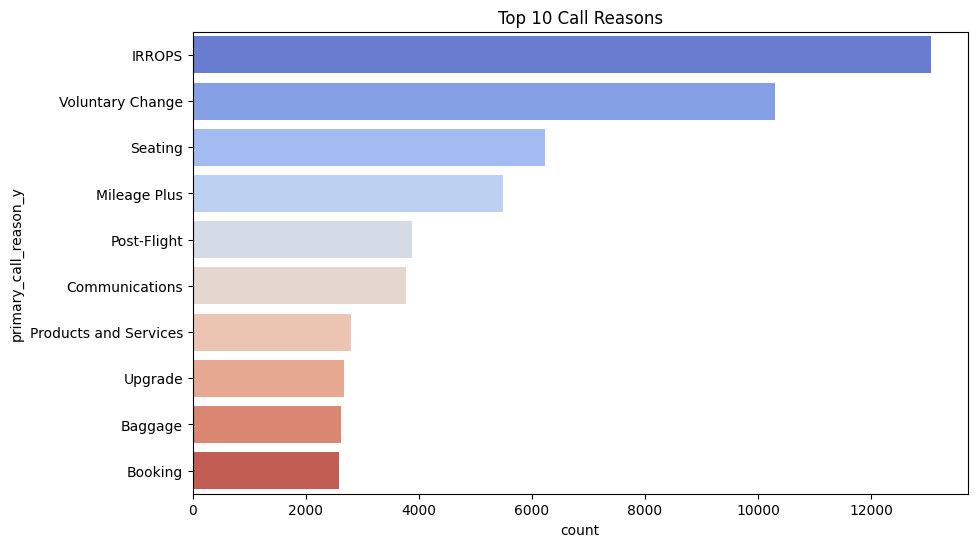

In [ ]:
#  Identify Recurring Call Reasons
frequent_reasons = merged_df['primary_call_reason_y'].value_counts().reset_index()
frequent_reasons.columns = ['primary_call_reason_y', 'count']
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=frequent_reasons.head(10), x='count', y='primary_call_reason_y', palette='coolwarm')
plt.title('Top 10 Call Reasons')
plt.show()

In [ ]:
# Analyze Transcripts for Escalation Patterns
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100)
X = vectorizer.fit_transform(merged_df['call_transcript'])
common_phrases = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
print(common_phrases.head(20))

flight      631962
agent       555458
customer    549932
let         310728
change      248693
help        201067
like        194177
thank       184727
united      173306
calling     159962
okay        156940
typing      155719
just        135322
work        134236
day         133868
time        127528
need        126268
yeah        123142
really      119979
thanks      119782
dtype: int64


In [ ]:
# Cluster Transcripts to Identify Categories of Escalation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(merged_df['call_transcript'])
kmeans = KMeans(n_clusters=5, random_state=42)
merged_df['cluster'] = kmeans.fit_predict(X_tfidf)
cluster_keywords = pd.DataFrame(kmeans.cluster_centers_, columns=tfidf_vectorizer.get_feature_names_out())
print(cluster_keywords.head())

        000      05am      05pm        10       100      1000      10am  \
0  0.001207  0.002559  0.003595  0.013763  0.016812  0.000115  0.016237   
1  0.016524  0.000148  0.000647  0.011527  0.010138  0.010633  0.002308   
2  0.002357  0.003359  0.005037  0.019123  0.005972  0.000140  0.018830   
3  0.011873  0.000048  0.000073  0.008400  0.014592  0.008454  0.000208   
4  0.004455  0.001401  0.002144  0.012108  0.016212  0.001148  0.010914   

       10pm        11      11am  ...    wrench     wrong      yeah      year  \
0  0.003099  0.013977  0.014081  ...  0.001971  0.000414  0.043269  0.007779   
1  0.002221  0.002013  0.000930  ...  0.003480  0.002322  0.036642  0.017995   
2  0.001926  0.015679  0.009745  ...  0.001534  0.003386  0.042936  0.005102   
3  0.000335  0.000543  0.000185  ...  0.000467  0.012506  0.038221  0.011629   
4  0.009052  0.009842  0.009657  ...  0.007541  0.003322  0.043865  0.005424   

      years       yep       yes  yesterday      york       yup  
0  

In [ ]:
test.head()

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168


In [ ]:
calls.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'hour', 'day_of_week', 'month', 'handle_time', 'primary_call_reason',
       'agent_id_y', 'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'abandoned', 'waiting_time', 'day'],
      dtype='object')

In [ ]:
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,hour,day_of_week,month,...,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,abandoned,waiting_time,day,primary_call_reason_y,cluster
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,23,2,7,...,963118,neutral,angry,-0.04,0.39,False,7.0,31,Voluntary Cancel,1
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,519057,calm,neutral,0.02,0.35,False,3.0,1,Booking,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,23,2,7,...,158319,neutral,polite,-0.13,0.32,False,8.0,31,IRROPS,0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,488324,neutral,frustrated,-0.20,0.20,False,5.0,1,Upgrade,0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,721730,neutral,polite,-0.05,0.35,False,10.0,1,Seating,0


In [ ]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])

# Calculate handle_time as the difference between call end and start times
calls['handle_time'] = (calls['call_end_datetime'] - calls['call_start_datetime']).dt.total_seconds()

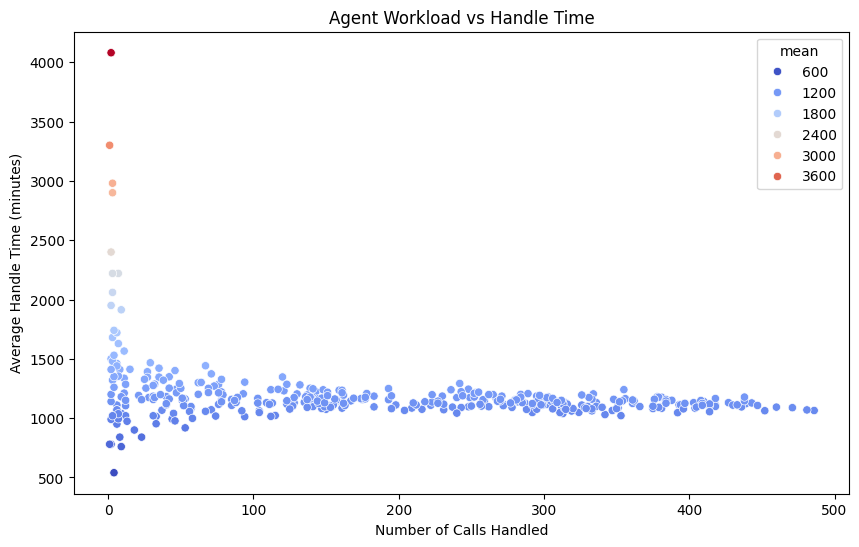

In [ ]:
agent_workload = calls.groupby('agent_id_y')['handle_time'].agg(['mean', 'count']).reset_index()

# Scatter plot: Agent Workload vs Handle Time
plt.figure(figsize=(10,6))
sns.scatterplot(data=agent_workload, x='count', y='mean', hue='mean', palette='coolwarm', sizes=(20, 200))
plt.title('Agent Workload vs Handle Time')
plt.xlabel('Number of Calls Handled')
plt.ylabel('Average Handle Time (minutes)')
plt.show()

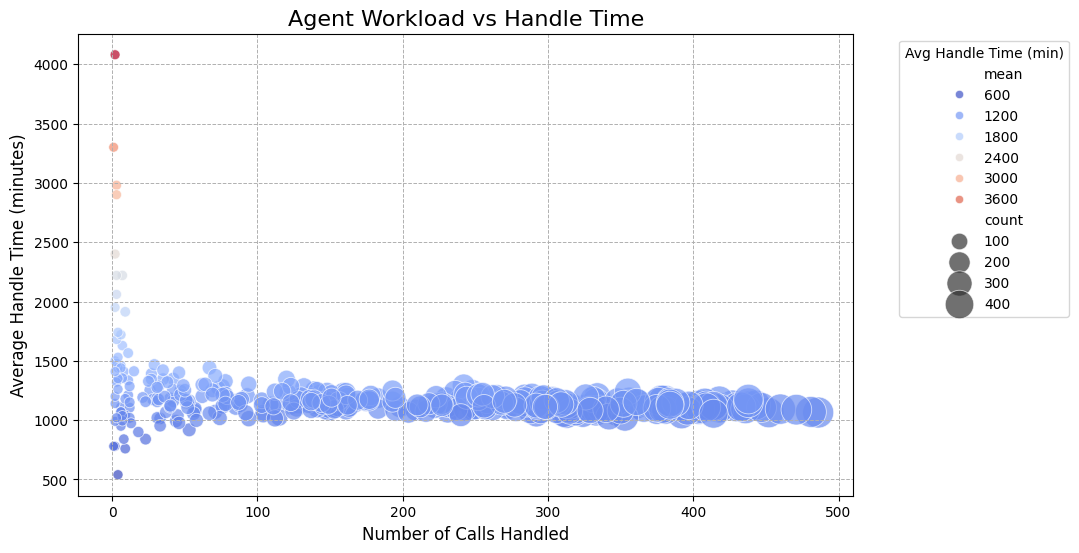

In [ ]:
# Bubble plot: Agent Workload vs Handle Time
plt.figure(figsize=(10,6))
bubble_plot = sns.scatterplot(
    data=agent_workload,
    x='count',
    y='mean',
    size='count',
    hue='mean',
    palette='coolwarm',
    sizes=(50, 500),  # Adjust bubble size range for better visibility
    alpha=0.7  # Make bubbles semi-transparent
)

# Customizing the plot for clarity
plt.title('Agent Workload vs Handle Time', fontsize=16)
plt.xlabel('Number of Calls Handled', fontsize=12)
plt.ylabel('Average Handle Time (minutes)', fontsize=12)
plt.legend(title='Avg Handle Time (min)', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show plot
plt.show()


C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\3119149686.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=calls, x='abandoned', y='waiting_time', palette='coolwarm')


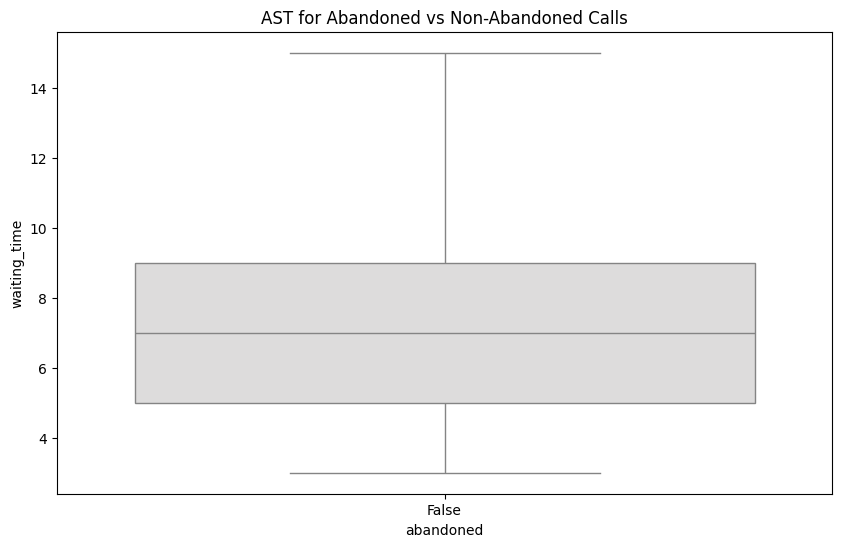

In [ ]:
# Identify abandoned calls (calls where agent was not assigned)
calls['abandoned'] = calls['agent_assigned_datetime'].isna()

# Group by abandoned status and calculate mean AST (waiting time)
calls['waiting_time'] = (pd.to_datetime(calls['agent_assigned_datetime']) - pd.to_datetime(calls['call_start_datetime'])).dt.total_seconds() / 60

# Plot AST for abandoned vs non-abandoned calls
plt.figure(figsize=(10,6))
sns.boxplot(data=calls, x='abandoned', y='waiting_time', palette='coolwarm')
plt.title('AST for Abandoned vs Non-Abandoned Calls')
plt.show()


In [ ]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['call_duration'] = (pd.to_datetime(calls['call_end_datetime']) - calls['call_start_datetime']).dt.total_seconds()
calls['call_hour'] = calls['call_start_datetime'].dt.hour

In [ ]:
calls.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,hour,day_of_week,month,...,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,abandoned,waiting_time,day,call_duration,call_hour
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,23,2,7,...,963118,neutral,angry,-0.04,0.39,False,7.0,31,2280.0,23
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,519057,calm,neutral,0.02,0.35,False,3.0,1,900.0,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,23,2,7,...,158319,neutral,polite,-0.13,0.32,False,8.0,31,1620.0,23
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,488324,neutral,frustrated,-0.20,0.20,False,5.0,1,720.0,0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0,3,8,...,721730,neutral,polite,-0.05,0.35,False,10.0,1,1140.0,0


In [ ]:
merged_df = calls.merge(reasons, on='call_id', how='left')

In [ ]:
call_reason_counts = merged_df['primary_call_reason_y'].value_counts()
call_reason_percentages = (call_reason_counts / call_reason_counts.sum()) * 100
print(call_reason_percentages)

primary_call_reason_y
IRROPS                     19.589516
Voluntary Change           15.439665
Seating                     9.336414
Mileage Plus                8.232188
Post-Flight                 5.804690
Communications              5.669662
Products and Services       4.188859
Upgrade                     4.023825
Baggage                     3.924805
Booking                     3.884296
Checkout                    2.760566
Check-In                    2.235458
Voluntary Cancel            1.956401
Digital Support             1.494306
ETC                         1.395286
Traveler Updates            1.158237
Schedule Change             1.060717
Other Topics                0.852175
Products & Services         0.714146
Disability                  0.591121
Check In                    0.577618
Post Flight                 0.559615
Voluntary  Cancel           0.417086
IRROPS                      0.381078
Other  Topics               0.351072
Voluntary Change            0.312064
Voluntary   Chan

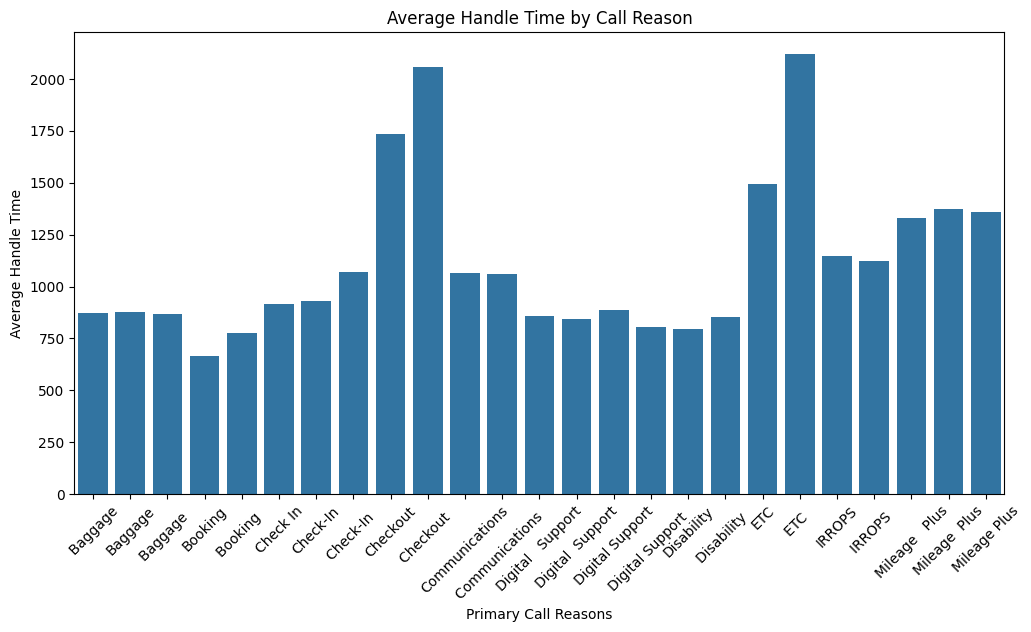

In [ ]:
average_handle_time = merged_df.groupby('primary_call_reason_y')['handle_time'].mean().reset_index().head(25)

plt.figure(figsize=(12, 6))
sns.barplot(data=average_handle_time, x='primary_call_reason_y', y='handle_time')
plt.xticks(rotation=45)
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Primary Call Reasons')
plt.ylabel('Average Handle Time')
plt.show()

In [ ]:
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['call_duration'] = (pd.to_datetime(merged_df['call_end_datetime']) - merged_df['call_start_datetime']).dt.total_seconds()
merged_df['call_duration'] = merged_df['call_start_datetime'].dt.hour

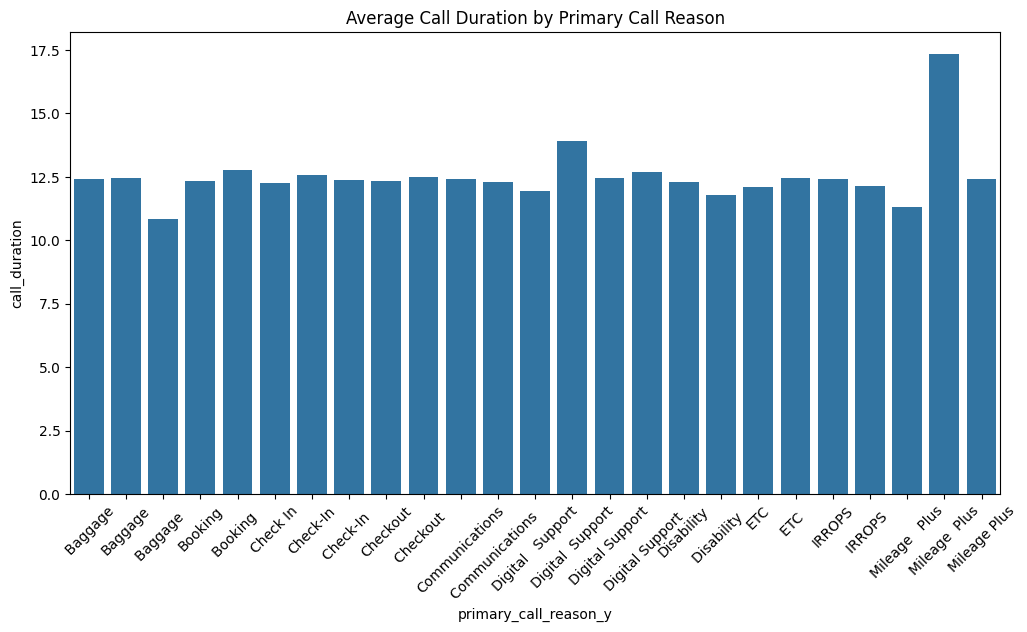

In [ ]:
avg_duration = merged_df.groupby('primary_call_reason_y')['call_duration'].mean().reset_index().head(25)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='primary_call_reason_y', y='call_duration')
plt.xticks(rotation=45)
plt.title('Average Call Duration by Primary Call Reason')
plt.show()

## AST

In [ ]:
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])

In [ ]:
merged_df['AST'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

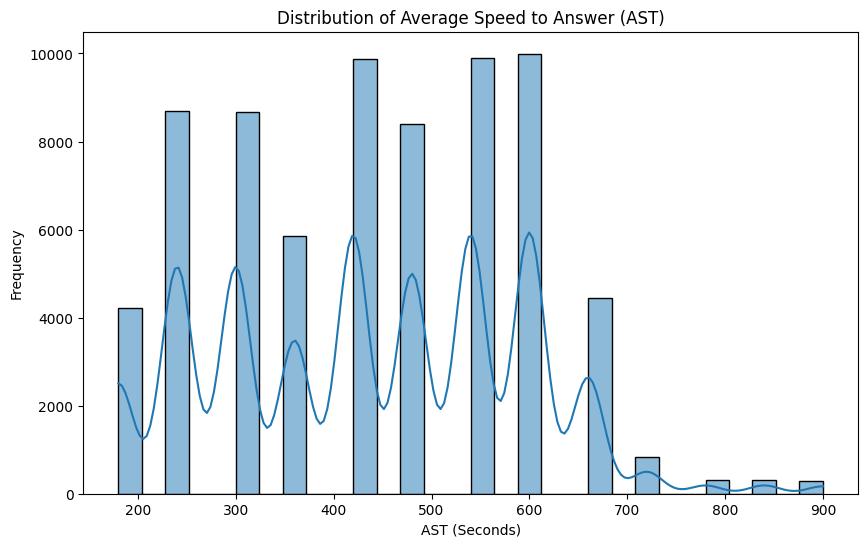

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['AST'], kde=True, bins=30)
plt.title('Distribution of Average Speed to Answer (AST)')
plt.xlabel('AST (Seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
merged_df['day_of_week'] = merged_df['call_start_datetime'].dt.dayofweek
weekday_ast = merged_df.groupby('day_of_week')['AST'].mean().reset_index()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\62036141.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=weekday_ast, x='day_of_week', y='AST', marker='o', palette='coolwarm')


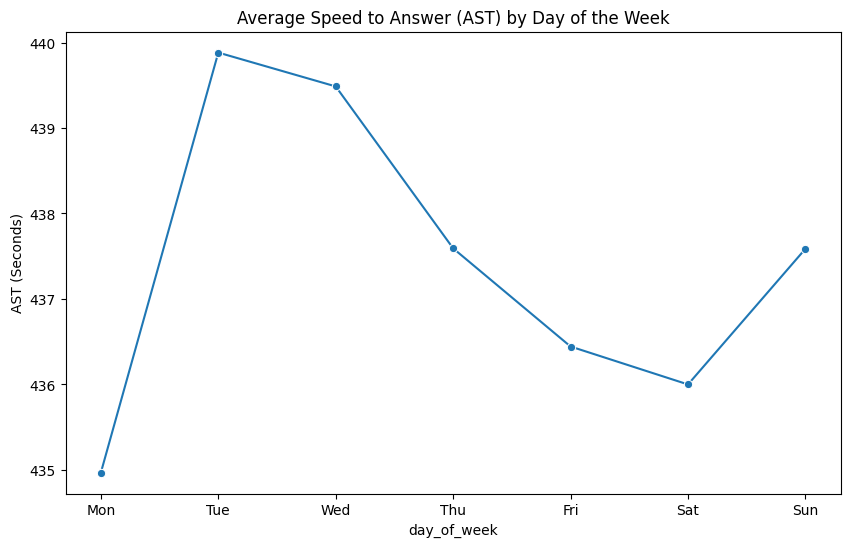

In [ ]:

plt.figure(figsize=(10,6))
sns.lineplot(data=weekday_ast, x='day_of_week', y='AST', marker='o', palette='coolwarm')
plt.title('Average Speed to Answer (AST) by Day of the Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('AST (Seconds)')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\993449621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ast_reason, x='primary_call_reason_y', y='AST', palette='coolwarm')


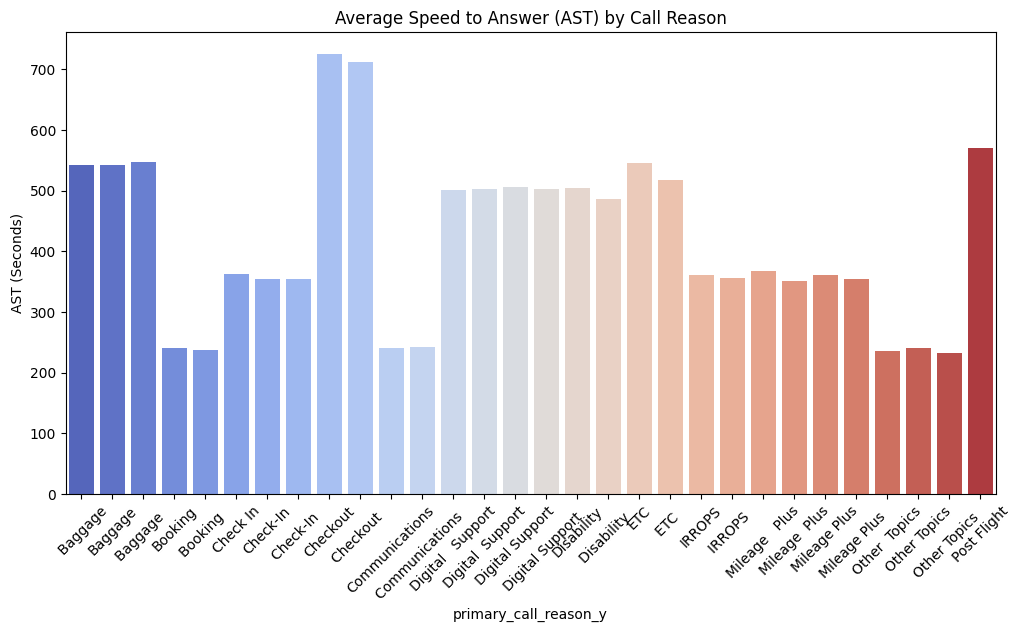

In [ ]:
ast_reason = merged_df.groupby('primary_call_reason_y')['AST'].mean().reset_index().head(30)
plt.figure(figsize=(12,6))
sns.barplot(data=ast_reason, x='primary_call_reason_y', y='AST', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Speed to Answer (AST) by Call Reason')
plt.ylabel('AST (Seconds)')
plt.show()

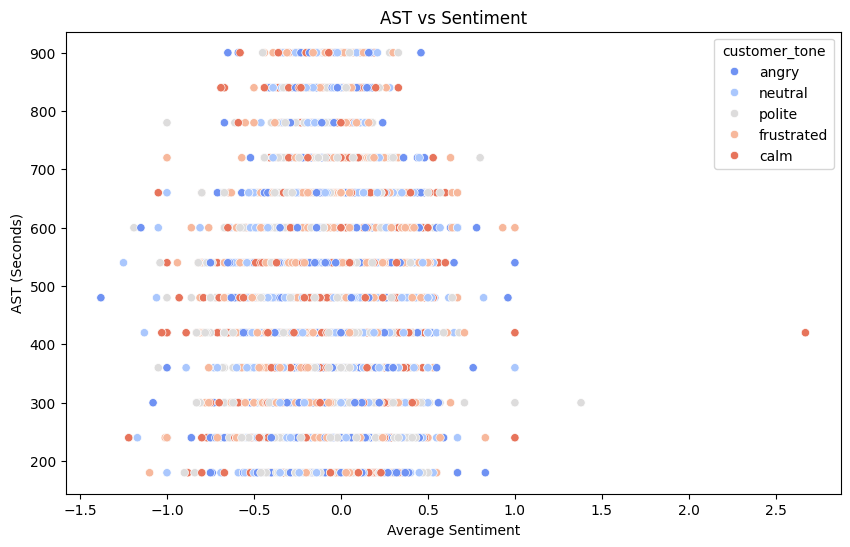

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='average_sentiment', y='AST', hue='customer_tone', palette='coolwarm')
plt.title('AST vs Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('AST (Seconds)')
plt.show()

In [ ]:
call_reason_counts = merged_df['primary_call_reason_y'].value_counts()
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

In [ ]:
ast_most_frequent = merged_df[merged_df['primary_call_reason_y'] == most_frequent_reason]['AST'].mean()
ast_least_frequent = merged_df[merged_df['primary_call_reason_y'] == least_frequent_reason]['AST'].mean()

In [ ]:
percentage_difference = ((ast_most_frequent - ast_least_frequent) / ast_least_frequent) * 100
print(f"Percentage difference between AST of most and least frequent reasons: {percentage_difference:.2f}%")

Percentage difference between AST of most and least frequent reasons: -49.98%


C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1270079288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ast_by_agent, x='agent_id_y', y='AST', palette='coolwarm')


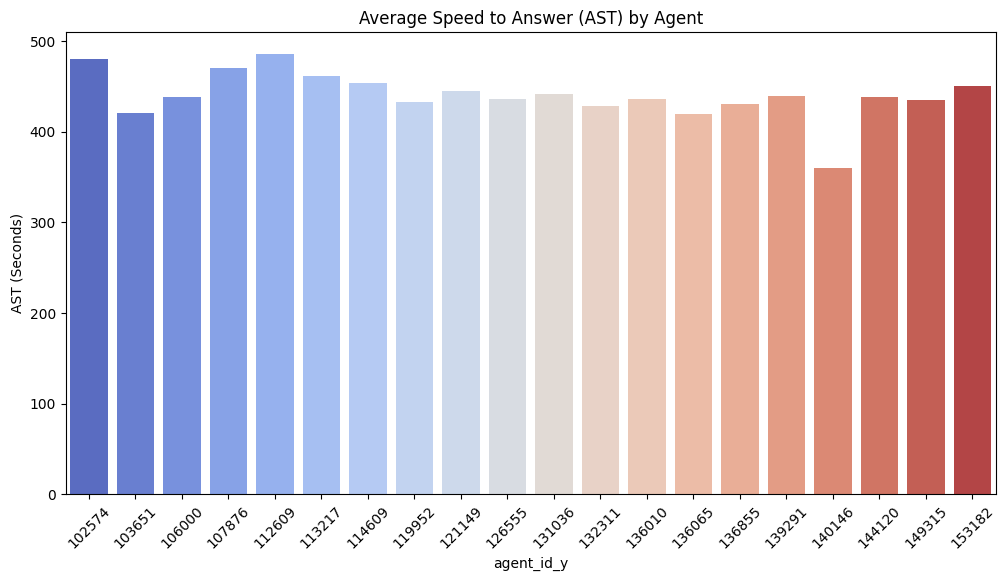

In [ ]:
ast_by_agent = merged_df.groupby('agent_id_y')['AST'].mean().reset_index().head(20)

plt.figure(figsize=(12,6))
sns.barplot(data=ast_by_agent, x='agent_id_y', y='AST', palette='coolwarm')
plt.title('Average Speed to Answer (AST) by Agent')
plt.xticks(rotation=45)
plt.ylabel('AST (Seconds)')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\315913576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_agents_ast, x='agent_id_y', y='AST', palette='coolwarm')


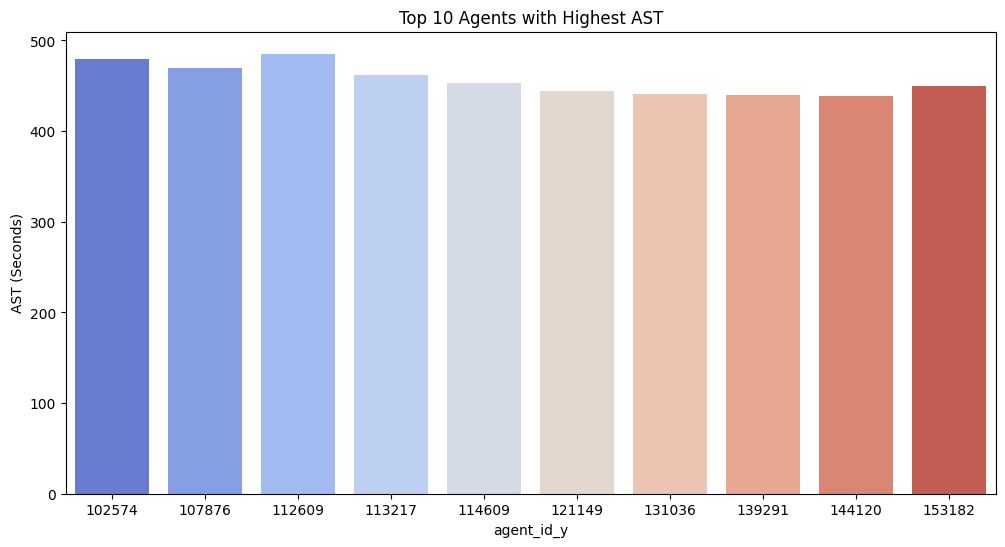

In [ ]:
top_agents_ast = ast_by_agent.nlargest(10, 'AST')

plt.figure(figsize=(12,6))
sns.barplot(data=top_agents_ast, x='agent_id_y', y='AST', palette='coolwarm')
plt.title('Top 10 Agents with Highest AST')
plt.ylabel('AST (Seconds)')
plt.show()

In [ ]:
merged_df2 = pd.merge(merged_df, customers, on='customer_id', how='inner')

In [ ]:
merged_df2.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'hour', 'day_of_week', 'month', 'handle_time', 'primary_call_reason_x',
       'agent_id_y', 'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'abandoned', 'waiting_time', 'day',
       'call_duration', 'call_hour', 'primary_call_reason_y', 'AST',
       'customer_name', 'elite_level_code'],
      dtype='object')

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\2628974157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ast_by_loyalty, x='elite_level_code', y='AST', palette='coolwarm')


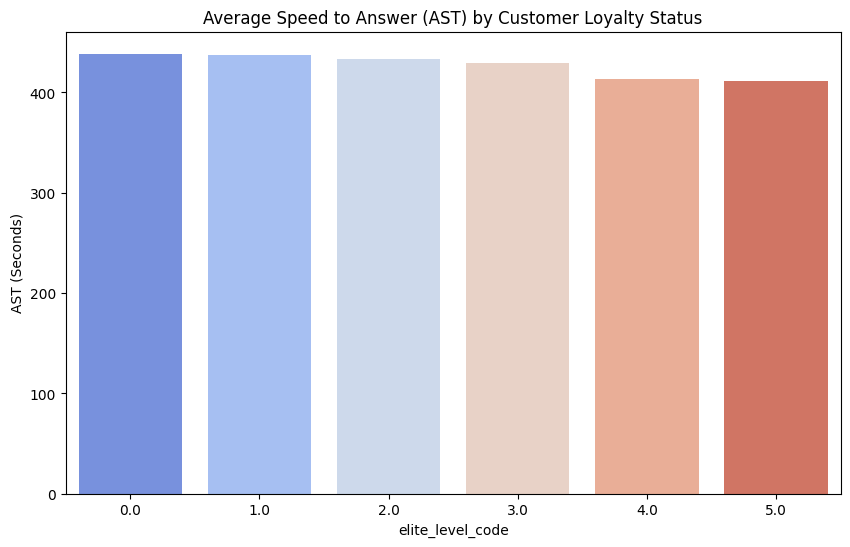

In [ ]:
ast_by_loyalty = merged_df2.groupby('elite_level_code')['AST'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=ast_by_loyalty, x='elite_level_code', y='AST', palette='coolwarm')
plt.title('Average Speed to Answer (AST) by Customer Loyalty Status')
plt.ylabel('AST (Seconds)')
plt.show()

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1453544469.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=ast_by_hour, x='hour_of_day', y='AST', marker='o', palette='coolwarm')


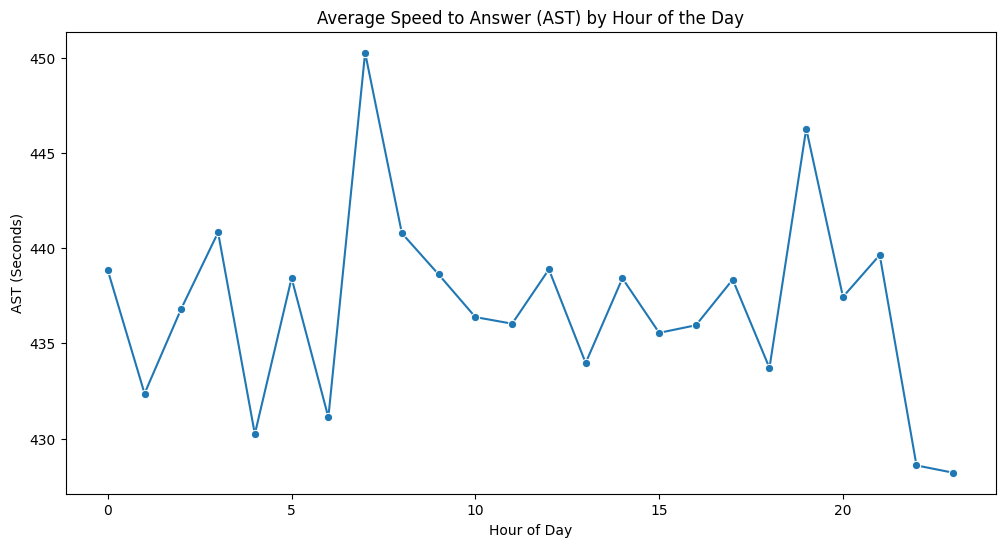

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\1453544469.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calls_by_hour, x='hour_of_day', y='number_of_calls', palette='coolwarm')


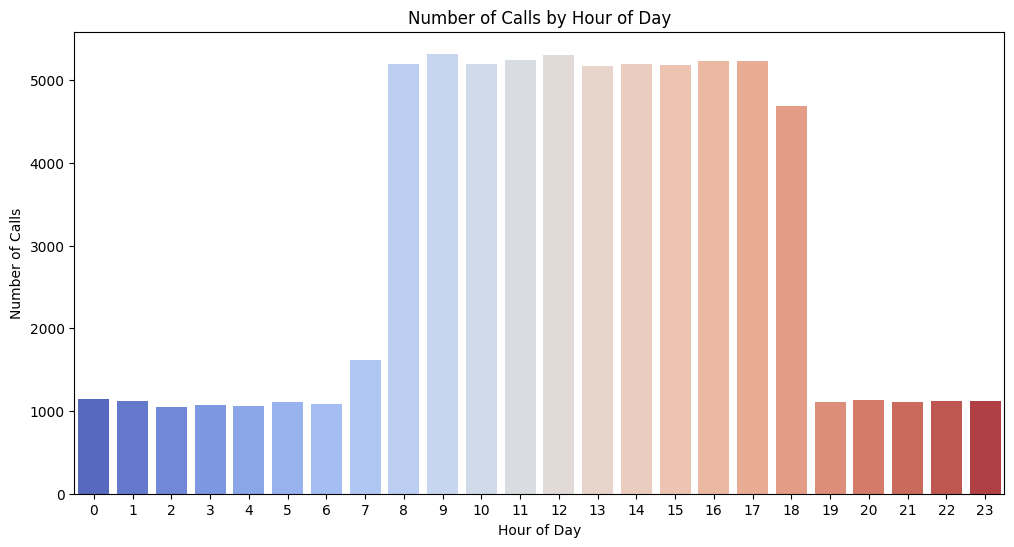

In [ ]:
# Step 1: Extract the hour of day from call start time
merged_df['hour_of_day'] = merged_df['call_start_datetime'].dt.hour

# Step 2: Analyze AST by Hour of Day
ast_by_hour = merged_df.groupby('hour_of_day')['AST'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=ast_by_hour, x='hour_of_day', y='AST', marker='o', palette='coolwarm')
plt.title('Average Speed to Answer (AST) by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('AST (Seconds)')
plt.show()

# Step 3: Calls by Hour (to see the call volume)
calls_by_hour = merged_df['hour_of_day'].value_counts().sort_index().reset_index()
calls_by_hour.columns = ['hour_of_day', 'number_of_calls']

plt.figure(figsize=(12,6))
sns.barplot(data=calls_by_hour, x='hour_of_day', y='number_of_calls', palette='coolwarm')
plt.title('Number of Calls by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.show()


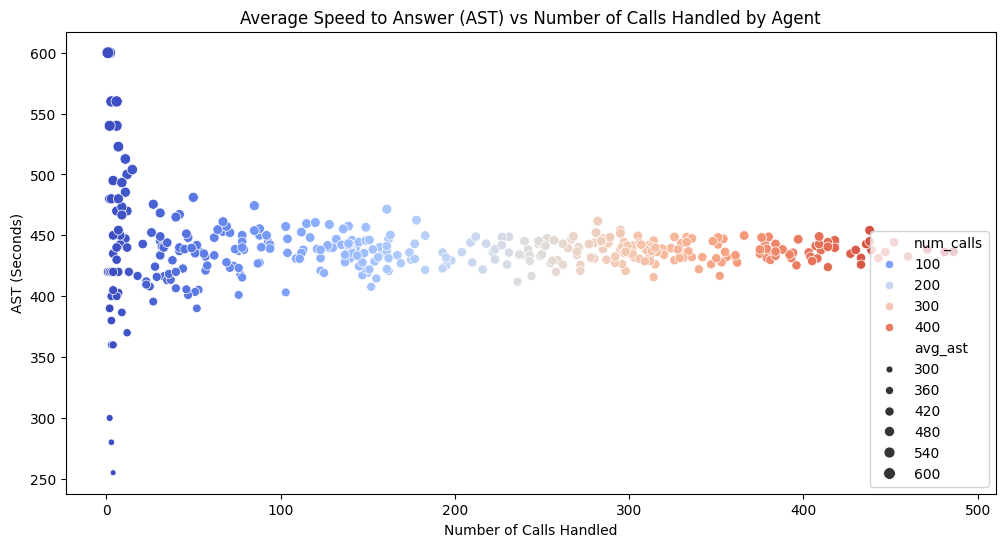

In [ ]:
ast_by_agent_call_volume = merged_df.groupby('agent_id_y').agg(
    num_calls=('call_id', 'count'),
    avg_ast=('AST', 'mean')
).reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(data=ast_by_agent_call_volume, x='num_calls', y='avg_ast', hue='num_calls', size='avg_ast', palette='coolwarm')
plt.title('Average Speed to Answer (AST) vs Number of Calls Handled by Agent')
plt.xlabel('Number of Calls Handled')
plt.ylabel('AST (Seconds)')
plt.show()

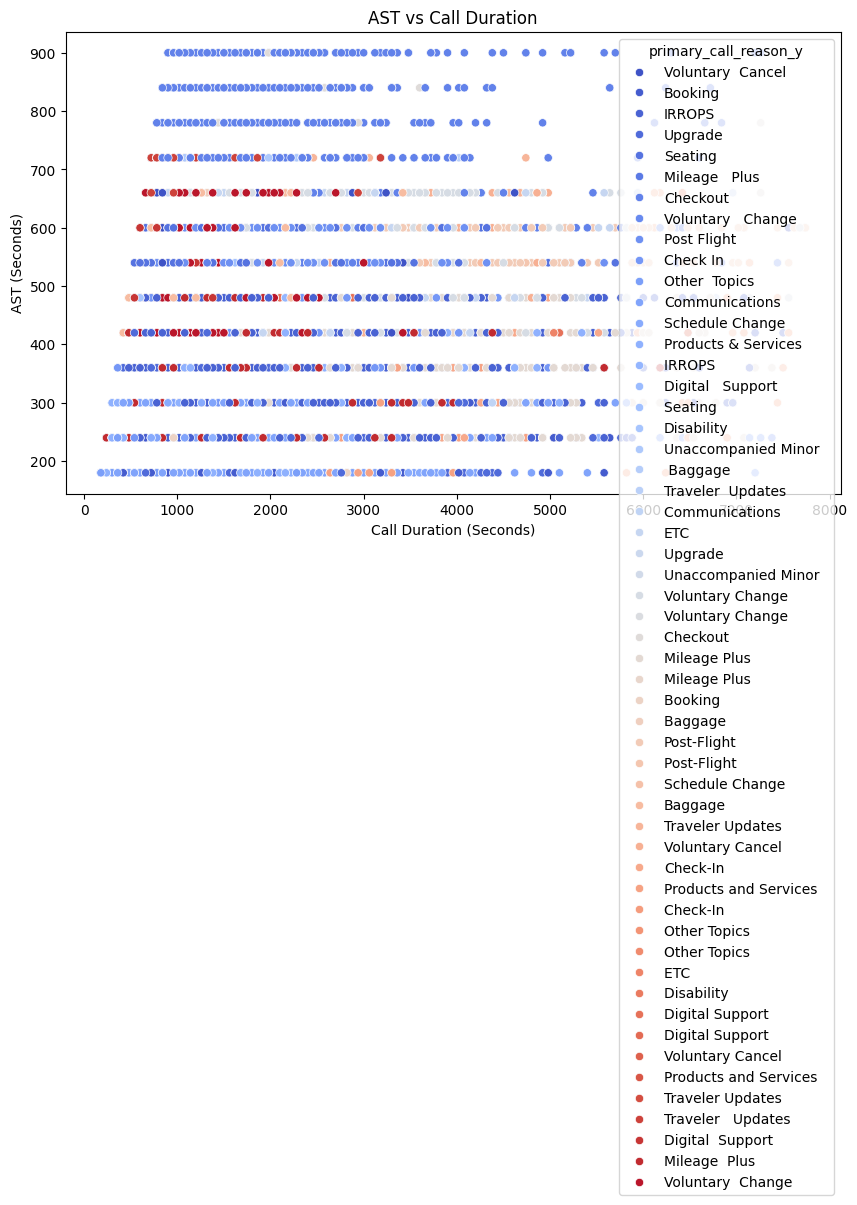

In [ ]:
merged_df['call_duration'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Step 2: Scatter plot of AST vs Call Duration
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='call_duration', y='AST', hue='primary_call_reason_y', palette='coolwarm')
plt.title('AST vs Call Duration')
plt.xlabel('Call Duration (Seconds)')
plt.ylabel('AST (Seconds)')
plt.show()

In [ ]:
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

C:\Users\Abhishek kumar\AppData\Local\Temp\ipykernel_3784\2817991450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ast_by_weekend, x='is_weekend', y='AST', palette='coolwarm')


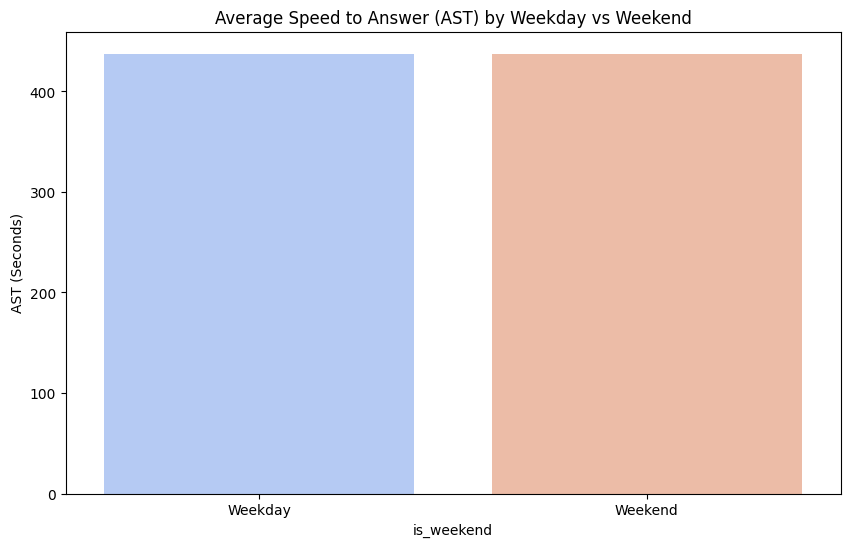

In [ ]:
ast_by_weekend = merged_df.groupby('is_weekend')['AST'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=ast_by_weekend, x='is_weekend', y='AST', palette='coolwarm')
plt.title('Average Speed to Answer (AST) by Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel('AST (Seconds)')
plt.show()

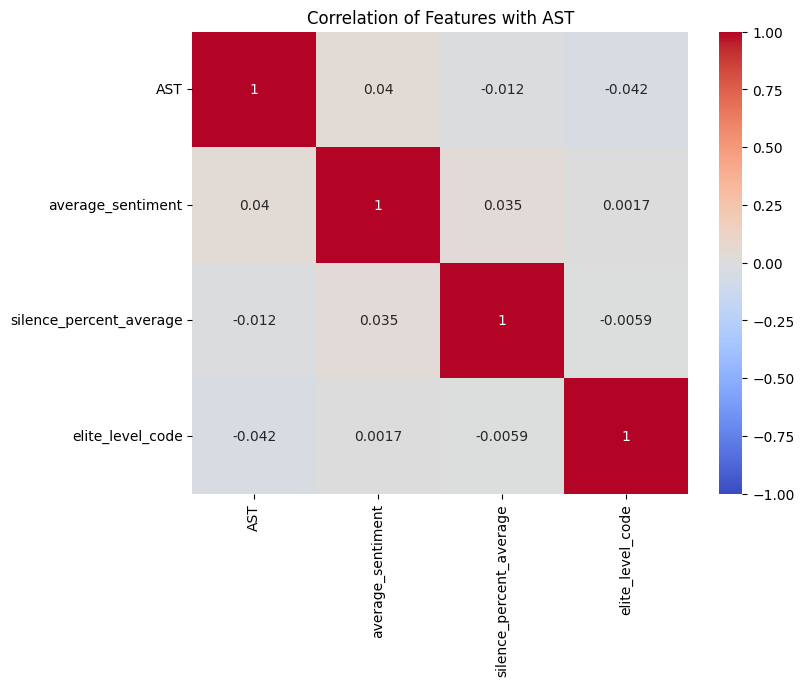

In [ ]:
# Step 1: Correlation Analysis with AST
corr_matrix = merged_df2[['AST', 'average_sentiment', 'silence_percent_average', 'elite_level_code']].corr()

# Step 2: Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with AST')
plt.show()

In [ ]:
merged_df2.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'hour', 'day_of_week', 'month', 'handle_time', 'primary_call_reason_x',
       'agent_id_y', 'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'abandoned', 'waiting_time', 'day',
       'call_duration', 'call_hour', 'primary_call_reason_y', 'AST',
       'customer_name', 'elite_level_code'],
      dtype='object')